# CRAWDAD

This R Jupyter notebook demonstrates how to apply CRAWDAD to CODEX spleen data collected as part of the HuBMAP consortium.

The first step is to install and load CRAWDAD. The tidyverse package is also loaded to auxiliate the analysis.

In [ ]:
require(remotes)
remotes::install_github('JEFworks-Lab/CRAWDAD')

In [3]:
library(crawdad)
library(tidyverse)

Load the package and convert the data to use as input to CRAWDAD functions.

In [4]:
## load the spleen data of the pkhl sample 
data('pkhl')
## convert dataframe to spatial points (SP)
cells <- crawdad::toSF(pos = pkhl[,c("x", "y")], celltypes = pkhl$celltypes)


creating `sf` object



Create shuffled background and calculate Z-scores.

In [6]:
## shuffle cells to create null background
shuffle.list <- crawdad:::makeShuffledCells(cells,
                                            scales = c(100, 200, 300, 400, 500, 600, 700, 800, 900, 1000),
                                            perms = 3,
                                            ncores = 7,
                                            seed = 1,
                                            verbose = FALSE)
## calculate the zscore for the cell-type pairs at different scales
results <- crawdad::findTrends(cells,
                               dist = 50,
                               shuffle.list = shuffle.list,
                               ncores = 7,
                               verbose = TRUE,
                               returnMeans = FALSE)
## convert output
dat <- crawdad::meltResultsList(results, withPerms = TRUE)

Evaluating significance for each cell type

using neighbor distance of 50

Calculating for pairwise combinations

B cells, red pulp

Blood endothelial

CD4 Memory T cells

CD8 Memory T cells

Fol B cells

Ki67 proliferating

Macrophages

Myeloid cells

Neutrophils/Monocytes

Podoplanin

Sinusoidal cells

indistinct

Time was 20.29 mins



Calculate significance threshold and plot results.

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.


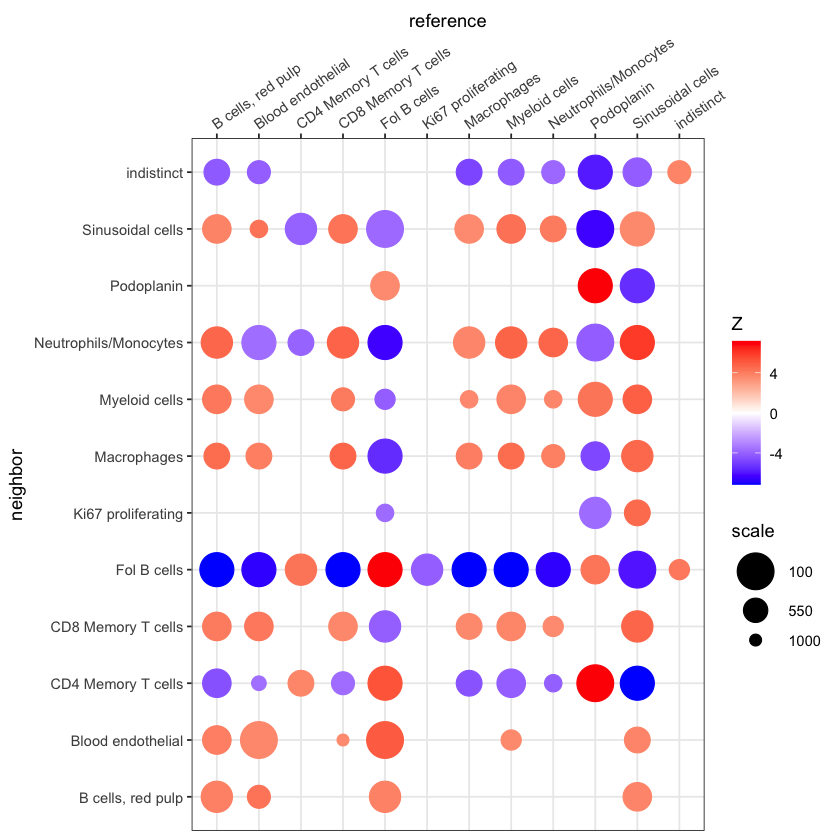

In [11]:
## calculate the zscore for the multiple-test correction
zsig <- correctZBonferroni(dat)
## summary visualization
vizRelationships(dat, zSigThresh = zsig, zScoreLimit = 2 * zsig, dotSizes = c(3, 10)) +
  theme(axis.text.x = element_text(angle = 35, h = 0))